In [92]:
import pandas as pd
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Load Datasets

In [93]:
!pip install --upgrade datasets fsspec

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


## **Arabic Dataset Evaluation**
Data from: https://aclanthology.org/2024.lrec-main.1308.pdf


In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
arabic_df = pd.read_csv("/content/drive/MyDrive/DS266/Project/Data/RawData/ar_hf.csv")

In [96]:
arabic_df

,text,labels,source,dataset,nb_annotators,post_author_country_location
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,0.0,Twitter,L-HSAB,3,unknown
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,0.0,Twitter,L-HSAB,3,unknown
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,0.0,Twitter,L-HSAB,3,unknown
3,وليد جنبلاط كاتب الحكمة يا قذر,0.0,Twitter,L-HSAB,3,unknown
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,0.0,Twitter,L-HSAB,3,unknown
...,...,...,...,...,...,...
449073,@USER روما محظوظين بذا المدرب بيروتي يسحب في ر...,0.0,Twitter,OSACT,3,unknown
449074,@USER هلا والله بالحب<LF>هلا لولو❤️😙<LF>...<LF...,0.0,Twitter,OSACT,3,unknown
449075,رينز فاز 😡😡😡😡😡😡😡 يعنني اوه شوفو العرض الأسطوري...,0.0,Twitter,OSACT,3,unknown
449076,@USER ييييع والله شيء يلوع الكبد مريضات الله ي...,0.0,Twitter,OSACT,3,unknown


In [97]:
arabic_df['text'][2139]

'عماد عثمان قاهر ابواق النظام السوري ولما وئام الحمار يحكي '

In [98]:
arabic_df.columns

Index(['text', 'labels', 'source', 'dataset', 'nb_annotators',
       'post_author_country_location'],
      dtype='object')

In [99]:
arabic_df['labels'].value_counts()

,count
labels,
0.0,432532
1.0,16546


In [100]:
#keep non offensive columns
non_hate_arabic_text = arabic_df[arabic_df['labels'] == 0]
non_hate_arabic_text["hatespeech"] = 0
non_hate_arabic_text = non_hate_arabic_text[["text", "hatespeech"]]
non_hate_arabic_text = non_hate_arabic_text.reset_index(drop= True)
non_hate_arabic_text["language"] = "arabic"
non_hate_arabic_text["target"] = "normal"
non_hate_arabic_text["directness"] = "normal"
non_hate_arabic_text["annotator_sentiment"] = "normal"
non_hate_arabic_text["group"] = "normal"

/tmp/ipython-input-100-193436171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_hate_arabic_text["hatespeech"] = 0


In [101]:
non_hate_arabic_text

,text,hatespeech,language,target,directness,annotator_sentiment,group
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,0,arabic,normal,normal,normal,normal
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,0,arabic,normal,normal,normal,normal
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,0,arabic,normal,normal,normal,normal
3,وليد جنبلاط كاتب الحكمة يا قذر,0,arabic,normal,normal,normal,normal
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,0,arabic,normal,normal,normal,normal
...,...,...,...,...,...,...,...
432527,@USER روما محظوظين بذا المدرب بيروتي يسحب في ر...,0,arabic,normal,normal,normal,normal
432528,@USER هلا والله بالحب<LF>هلا لولو❤️😙<LF>...<LF...,0,arabic,normal,normal,normal,normal
432529,رينز فاز 😡😡😡😡😡😡😡 يعنني اوه شوفو العرض الأسطوري...,0,arabic,normal,normal,normal,normal
432530,@USER ييييع والله شيء يلوع الكبد مريضات الله ي...,0,arabic,normal,normal,normal,normal


In [102]:
# keep 5000 rows
non_hate_arabic_text = non_hate_arabic_text.sample(n=5000, random_state=42)
non_hate_arabic_text = non_hate_arabic_text.reset_index(drop = True)
non_hate_arabic_text

,text,hatespeech,language,target,directness,annotator_sentiment,group
0,رُغم قُبلته الإعتذار لها ، لكنها ما زالت مُعرض...,0,arabic,normal,normal,normal,normal
1,قال رسول الله ﷺ : . عليكَ بالرِّفقِ ؛ فإنَّهُ ...,0,arabic,normal,normal,normal,normal
2,و لا المانيا ولا بريطانيا و لا امريكا ولا روسي...,0,arabic,normal,normal,normal,normal
3,اي كذبه فيهم,0,arabic,normal,normal,normal,normal
4,شكرًا للناس اللي معانا بدون أسباب،بدون شروط،بد...,0,arabic,normal,normal,normal,normal
...,...,...,...,...,...,...,...
4995,انو الهوت دوج صار من تاريخ امريكا الحديث,0,arabic,normal,normal,normal,normal
4996,ولا احكي لما اجيب اغراض من كارفور و يكون من ال...,0,arabic,normal,normal,normal,normal
4997,لا ول داومي اررح نتاخر بلييييز الي زمان ما شفت...,0,arabic,normal,normal,normal,normal
4998,بحضر اليوفي واللعيبة قاعدين,0,arabic,normal,normal,normal,normal


# **French Dataset**

Data from: https://aclanthology.org/2024.woah-1.23/

https://huggingface.co/datasets/manueltonneau/french-hate-speech-superset

In [ ]:
french_df = pd.read_csv("/content/drive/MyDrive/DS266/Project/Data/RawData/fr_hf.csv")
french_df

,text,labels,target,source,dataset,nb_annotators,tweet_id
0,On ne peut pas faire confiance aux musulmans c...,1,islam,NGO,CONAN,1,NaN
1,Les musulmans ne sont pas dignes de confiance.,1,islam,NGO,CONAN,1,NaN
2,Vous ne devriez pas croire les musulmans.,1,islam,NGO,CONAN,1,NaN
3,Les musulmans empêchent les gens de manger pen...,1,islam,NGO,CONAN,1,NaN
4,Les musulmans ne laissent pas les gens s'en pr...,1,islam,NGO,CONAN,1,NaN
...,...,...,...,...,...,...,...
18066,Kevin câest un sal noir.,1,NaN,Twitter,FTR,2,NaN
18067,"bougnoule bamboula sale arabe , elle est belle...",1,NaN,Twitter,FTR,2,NaN
18068,@USER Tu viens de le traiter de sal noir ?,1,NaN,Twitter,FTR,2,NaN
18069,SAL NOIR LINK,1,NaN,Twitter,FTR,2,NaN


<Axes: >

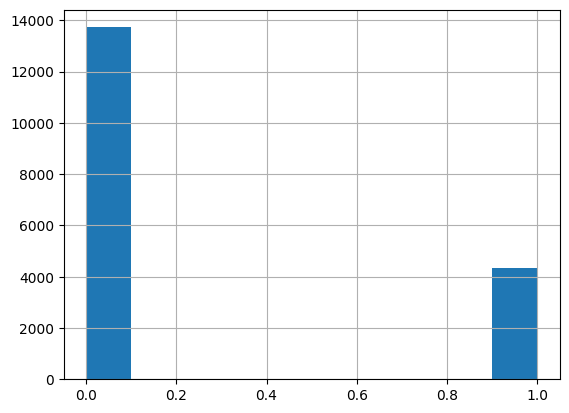

In [104]:
#labels: annotation of whether the post is hateful (== 1) or not (==0)
french_df['labels'].hist()

In [105]:
#keep non offensive columns
non_hate_french_text = french_df[french_df['labels'] == 0 ]
non_hate_french_text = non_hate_french_text[["text", "labels"]]
non_hate_french_text = non_hate_french_text.rename(columns={"labels": "hatespeech"})
non_hate_french_text = non_hate_french_text.reset_index(drop= True)
non_hate_french_text["language"] = "french"
non_hate_french_text["target"] = "normal"
non_hate_french_text["directness"] = "normal"
non_hate_french_text["annotator_sentiment"] = "normal"
non_hate_french_text["group"] = "normal"

In [106]:
non_hate_french_text

,text,hatespeech,language,target,directness,annotator_sentiment,group
0,Alors julie t'ai dégeulasse de sortir avec un...,0,french,normal,normal,normal,normal
1,allo mme est homophobe,0,french,normal,normal,normal,normal
2,on est pas ensemble déjà puis même si c'était...,0,french,normal,normal,normal,normal
3,laissé la tranquille elle n'est pas avec elle...,0,french,normal,normal,normal,normal
4,mais assumer vous degouter bande de crasseuse,0,french,normal,normal,normal,normal
...,...,...,...,...,...,...,...
13726,jâfrai jamais de trÃªve et tant pis si jâe...,0,french,normal,normal,normal,normal
13727,@USER Le dernier tweet que jâai vu sur lui c...,0,french,normal,normal,normal,normal
13728,"""@USER @USER @USER @USER Prcic suffit Ã mon b...",0,french,normal,normal,normal,normal
13729,18h17 câest le moment parfait pour que les c...,0,french,normal,normal,normal,normal


In [107]:

non_hate_french_text = non_hate_french_text.sample(n=5000, random_state=42)
non_hate_french_text = non_hate_french_text.reset_index(drop=True)

In [108]:
non_hate_ar_fr = pd.concat([non_hate_arabic_text, non_hate_french_text], ignore_index=True)
non_hate_ar_fr

,text,hatespeech,language,target,directness,annotator_sentiment,group
0,رُغم قُبلته الإعتذار لها ، لكنها ما زالت مُعرض...,0,arabic,normal,normal,normal,normal
1,قال رسول الله ﷺ : . عليكَ بالرِّفقِ ؛ فإنَّهُ ...,0,arabic,normal,normal,normal,normal
2,و لا المانيا ولا بريطانيا و لا امريكا ولا روسي...,0,arabic,normal,normal,normal,normal
3,اي كذبه فيهم,0,arabic,normal,normal,normal,normal
4,شكرًا للناس اللي معانا بدون أسباب،بدون شروط،بد...,0,arabic,normal,normal,normal,normal
...,...,...,...,...,...,...,...
9995,"""@USER @USER @USER @USER ESPECE D'ENORME FILS ...",0,french,normal,normal,normal,normal
9996,@USER sale richou,0,french,normal,normal,normal,normal
9997,@USER @USER @USER @USER mael rentre pas dans l...,0,french,normal,normal,normal,normal
9998,sans commentaire ....allemagne : les clans ara...,0,french,normal,normal,normal,normal


# **English datasets**
Dataset 1 from: https://ojs.aaai.org/index.php/ICWSM/article/view/14955/14805

https://github.com/t-davidson/hate-speech-and-offensive-language


Dataset 2 from: https://aclanthology.org/2022.nlperspectives-1.11/

https://huggingface.co/datasets/ucberkeley-dlab/measuring-hate-speech

Dataset 3 from: https://dl.acm.org/doi/pdf/10.1145/3368567.3368584?download=true

https://hasocfire.github.io/hasoc/2019/dataset.html

In [ ]:
df_english = pd.read_csv("/content/drive/MyDrive/DS266/Project/Data/RawData/english_data.csv")
print(f"Length of English non-hate dataset: {len(df_english)}")
print(f"Columns in English non-hate dataset: {df_english.columns}")
df_english.head(20)

Length of English non-hate dataset: 24783
Columns in English non-hate dataset: Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [110]:
# FILTER NON-HATE SAMPLES
df_english_nonhate = df_english[
    (df_english["hate_speech"] == 0) & (df_english["offensive_language"] == 0) & (df_english["neither"] == 3)
]

print(f"Number of non-hate samples in English Nonhate dataset: {len(df_english_nonhate)}")

print(df_english_nonhate['tweet'][0:100])

Number of non-hate samples in English Nonhate dataset: 2753
0      !!! RT @mayasolovely: As a woman you shouldn't...
63     "@Addicted2Guys: -SimplyAddictedToGuys http://...
70     "@ArizonasFinest6: Why the eggplant emoji doe?...
115    "@DomWorldPeace: Baseball season for the win. ...
118    "@DunderbaIl: I'm an early bird and I'm a nigh...
                             ...                        
850    #mt browngal #gouache #monkey #tiki http://t.c...
853    #np Shy Glizzy - Awwsome (Remix) (Feat. 2 Chai...
856    #philhughes @Yankees #nyy better then UR whole...
905    #portlandia #putabirdonit RT @mightymouse105: ...
909    #rejectedpeanutsspecials Its The Grape Crackhe...
Name: tweet, Length: 100, dtype: object


In [111]:
#keep non offensive columns
df_english_nonhate = df_english_nonhate[["tweet", "hate_speech"]]
df_english_nonhate = df_english_nonhate.rename(columns={"hate_speech": "hatespeech", "tweet": "text"})
df_english_nonhate = df_english_nonhate.reset_index(drop= True)
df_english_nonhate["language"] = "english"
df_english_nonhate["target"] = "normal"
df_english_nonhate["directness"] = "normal"
df_english_nonhate["annotator_sentiment"] = "normal"
df_english_nonhate["group"] = "normal"
df_english_nonhate.head()

,text,hatespeech,language,target,directness,annotator_sentiment,group
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,english,normal,normal,normal,normal
1,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",0,english,normal,normal,normal,normal
2,"""@ArizonasFinest6: Why the eggplant emoji doe?...",0,english,normal,normal,normal,normal
3,"""@DomWorldPeace: Baseball season for the win. ...",0,english,normal,normal,normal,normal
4,"""@DunderbaIl: I'm an early bird and I'm a nigh...",0,english,normal,normal,normal,normal


In [112]:
# Dataset 2
df_berekely_hate = load_dataset("ucberkeley-dlab/measuring-hate-speech")
print(df_berekely_hate)


DatasetDict({
    train: Dataset({
        features: ['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence', 'genocide', 'attack_defend', 'hatespeech', 'hate_speech_score', 'text', 'infitms', 'outfitms', 'annotator_severity', 'std_err', 'annotator_infitms', 'annotator_outfitms', 'hypothesis', 'target_race_asian', 'target_race_black', 'target_race_latinx', 'target_race_middle_eastern', 'target_race_native_american', 'target_race_pacific_islander', 'target_race_white', 'target_race_other', 'target_race', 'target_religion_atheist', 'target_religion_buddhist', 'target_religion_christian', 'target_religion_hindu', 'target_religion_jewish', 'target_religion_mormon', 'target_religion_muslim', 'target_religion_other', 'target_religion', 'target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_specific_country', 'target_origin_undocumented', 'target_origin_other', 'target_origin', 'target_gender_men', 'target

In [114]:
# FILTER NON-HATE SAMPLES
df_berkeley_nonhate = df_berekely_hate['train'].filter(
    lambda x: x["sentiment"] == 0
       and x["hatespeech"] == 0
       and x["hate_speech_score"] < 0
    )

print(f"Number of non-hate samples in Berkeley datset: {len(df_berkeley_nonhate)}")
# print(train_berkeley_hate_non_hate["text"])

Number of non-hate samples in Berkeley datset: 9520


In [115]:
df_berkeley_nonhate = df_berkeley_nonhate.to_pandas().drop_duplicates()
print(len(df_berkeley_nonhate))
df_berkeley_nonhate.head()

9520


,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,23643,9750,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,1323,2017,0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,10694,8325,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [116]:
# print unique comment ids
print(len(df_berkeley_nonhate["comment_id"].unique()))

3678


In [117]:
#keep non offensive columns
df_berkeley_nonhate = df_berkeley_nonhate[["text", "hatespeech"]]
df_berkeley_nonhate = df_berkeley_nonhate.reset_index(drop= True)
df_berkeley_nonhate["language"] = "english"
df_berkeley_nonhate["target"] = "normal"
df_berkeley_nonhate["directness"] = "normal"
df_berkeley_nonhate["annotator_sentiment"] = "normal"
df_berkeley_nonhate["group"] = "normal"
df_berkeley_nonhate.head()

,text,hatespeech,language,target,directness,annotator_sentiment,group
0,Yes indeed. She sort of reminds me of the elde...,0.0,english,normal,normal,normal,normal
1,The trans women reading this tweet right now i...,0.0,english,normal,normal,normal,normal
2,9) uhhhh i like being lgbt a lot. i feel proud...,0.0,english,normal,normal,normal,normal
3,"Thank you for posting this! Gives us other ""no...",0.0,english,normal,normal,normal,normal
4,You are an amazing dad! Don't forget that girl...,0.0,english,normal,normal,normal,normal


In [118]:
df_berkeley_nonhate = df_berkeley_nonhate.drop_duplicates()
print(len(df_berkeley_nonhate))

3678


In [ ]:
# Dataset 3
df_english_2 = pd.read_csv("/content/drive/MyDrive/DS266/Project/Data/RawData/hasoc2019_en.csv", sep='\t')
print(f"Length of English non-hate dataset: {len(df_english_2)}")
print(f"Columns in English non-hate dataset: {df_english_2.columns}")
df_english_2.head(20)

Length of English non-hate dataset: 5852
Columns in English non-hate dataset: Index(['text_id', 'text', 'task_1', 'task_2', 'task_3'], dtype='object')


,text_id,text,task_1,task_2,task_3
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NOT,NONE,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NOT,NONE,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NOT,NONE,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NOT,NONE,NONE
5,hasoc_en_6,@kellymiller513 @TheRealOJ32 I hope you rememb...,NOT,NONE,NONE
6,hasoc_en_7,@ICC Latest design of #WC2019 trophy. #CWC2019...,NOT,NONE,NONE
7,hasoc_en_8,#ADOS #trendingnow #blacklivesmatter #justice ...,HOF,PRFN,TIN
8,hasoc_en_9,Thanks for your support! Wow 600k. Graffiti ha...,NOT,NONE,NONE
9,hasoc_en_10,By wearing the #BalidaanBadge over his gloves ...,NOT,NONE,NONE


In [120]:
# FILTER NON-HATE SAMPLES
df_english_2_nonhate = df_english_2[
    df_english_2["task_1"] == "NOT"
    ]

print(f"Number of non-hate samples in this English dataset: {len(df_english_2_nonhate)}")

Number of non-hate samples in this English dataset: 3591


In [121]:
#keep non offensive columns
df_english_2_nonhate = df_english_2_nonhate[["text"]]
df_english_2_nonhate = df_english_2_nonhate.reset_index(drop= True)
df_english_2_nonhate["hatespeech"] = 0
df_english_2_nonhate["language"] = "english"
df_english_2_nonhate["target"] = "normal"
df_english_2_nonhate["directness"] = "normal"
df_english_2_nonhate["annotator_sentiment"] = "normal"
df_english_2_nonhate["group"] = "normal"
df_english_2_nonhate.head()

,text,hatespeech,language,target,directness,annotator_sentiment,group
0,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,0,english,normal,normal,normal,normal
1,@cricketworldcup Guess who would be the winner...,0,english,normal,normal,normal,normal
2,Corbyn is too politically intellectual for #Bo...,0,english,normal,normal,normal,normal
3,All the best to #TeamIndia for another swimmin...,0,english,normal,normal,normal,normal
4,@kellymiller513 @TheRealOJ32 I hope you rememb...,0,english,normal,normal,normal,normal


In [122]:
# Concat df_english_nonhate and df_berkeley_nonhate
df_english_nonhate = pd.concat([df_english_nonhate, df_berkeley_nonhate, df_english_2_nonhate], ignore_index=True)
len(df_english_nonhate)

10022

# **Language hate dataset**

Dataset from: https://arxiv.org/pdf/1908.11049.pdf

https://huggingface.co/datasets/nedjmaou/MLMA_hate_speech

In [123]:
# load datasets
ds_mlma_hate = load_dataset("nedjmaou/MLMA_hate_speech")
print(ds_mlma_hate)

DatasetDict({
    train: Dataset({
        features: ['HITId', 'tweet', 'sentiment', 'directness', 'annotator_sentiment', 'target', 'group'],
        num_rows: 18661
    })
})


In [124]:
# Convert MLMA dataset to pandas DataFrames
mlma_df = ds_mlma_hate['train'].to_pandas().reset_index(drop=True)

In [125]:
mlma_df['target'].value_counts()

,count
target,
origin,8039
other,4948
disability,2356
gender,1851
sexual_orientation,1040
religion,427


In [126]:
mlma_df['language'] = None
mlma_df.loc[:3352, 'language'] = 'arabic'      # 0 to 3352 (inclusive)
mlma_df.loc[3353:14646, 'language'] = 'english' # 3353 to 14646 (inclusive)
mlma_df.loc[14647:, 'language'] = 'french'      # 14647 to end

# Move 'language' to be the 3rd column
cols = list(mlma_df.columns)
cols.insert(2, cols.pop(cols.index('language')))
mlma_df = mlma_df[cols]

# Check the assignment
print(f"MLMA {mlma_df['language'].value_counts(dropna=False)}\n")
print(mlma_df.columns)

MLMA language
english    11294
french      4014
arabic      3353
Name: count, dtype: int64

Index(['HITId', 'tweet', 'language', 'sentiment', 'directness',
       'annotator_sentiment', 'target', 'group'],
      dtype='object')


## Clean Columns and Merge

In [127]:
# Defining hate columns
mlma_df['hatespeech'] = 1

# Set MLMA's 'tweet' column to its 'text' column (if not already)
mlma_df.rename(columns={'tweet': 'text'}, inplace=True)

mlma_df.drop(columns=['sentiment'], inplace=True)


# Filter English dataset for only columns in MLMA
filtered_english_nonhate = df_english_nonhate[['text', 'language', 'directness', 'annotator_sentiment', 'target', 'group', 'hatespeech']]

# Concatenate the two DataFrames
combined_df = pd.concat([mlma_df, filtered_english_nonhate], ignore_index=True) # ignore_index=True to create new index

print(combined_df.head())
print(combined_df.tail())
print(combined_df.shape)

   HITId                                               text language  \
0    1.0  صلاة الفجر خير لك من ترديد بول البعير وسبي الن...   arabic   
1    2.0  صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...   arabic   
2    3.0  طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...   arabic   
3    4.0  @user @user انا اوافقك بخصوص السوريين و العراق...   arabic   
4    5.0  هذه السعودية التي شعبها شعب الخيم و بول البعير...   arabic   

  directness                           annotator_sentiment  target  \
0   indirect                                         shock  gender   
1   indirect  anger_confusion_sadness_indifference_disgust   other   
2   indirect                                  indifference   other   
3     direct                                  indifference  origin   
4   indirect                                  indifference  origin   

        group  hatespeech  
0  individual         1.0  
1       other         1.0  
2  individual         1.0  
3       other         1.0  
4     

In [128]:
combined_df.columns

Index(['HITId', 'text', 'language', 'directness', 'annotator_sentiment',
       'target', 'group', 'hatespeech'],
      dtype='object')

In [129]:
combined_df

,HITId,text,language,directness,annotator_sentiment,target,group,hatespeech
0,1.0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,arabic,indirect,shock,gender,individual,1.0
1,2.0,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,arabic,indirect,anger_confusion_sadness_indifference_disgust,other,other,1.0
2,3.0,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,arabic,indirect,indifference,other,individual,1.0
3,4.0,@user @user انا اوافقك بخصوص السوريين و العراق...,arabic,direct,indifference,origin,other,1.0
4,5.0,هذه السعودية التي شعبها شعب الخيم و بول البعير...,arabic,indirect,indifference,origin,other,1.0
...,...,...,...,...,...,...,...,...
28678,NaN,@DOlusegun @elrufai Hope they don't becomes #D...,english,normal,normal,normal,normal,0.0
28679,NaN,@gtconway3d @KellyannePolls @realDonaldTrump H...,english,normal,normal,normal,normal,0.0
28680,NaN,@washingtonpost This is something everyone sho...,english,normal,normal,normal,normal,0.0
28681,NaN,Sorry about that. Has anybody got a #dickhead ...,english,normal,normal,normal,normal,0.0


In [130]:
MLMA_eng_target_variables = combined_df[["text", "language", "target", "hatespeech", "directness", "annotator_sentiment", "group"]]

In [131]:
hate_detect = pd.concat([non_hate_ar_fr, MLMA_eng_target_variables ], ignore_index=True)
hate_detect

,text,hatespeech,language,target,directness,annotator_sentiment,group
0,رُغم قُبلته الإعتذار لها ، لكنها ما زالت مُعرض...,0.0,arabic,normal,normal,normal,normal
1,قال رسول الله ﷺ : . عليكَ بالرِّفقِ ؛ فإنَّهُ ...,0.0,arabic,normal,normal,normal,normal
2,و لا المانيا ولا بريطانيا و لا امريكا ولا روسي...,0.0,arabic,normal,normal,normal,normal
3,اي كذبه فيهم,0.0,arabic,normal,normal,normal,normal
4,شكرًا للناس اللي معانا بدون أسباب،بدون شروط،بد...,0.0,arabic,normal,normal,normal,normal
...,...,...,...,...,...,...,...
38678,@DOlusegun @elrufai Hope they don't becomes #D...,0.0,english,normal,normal,normal,normal
38679,@gtconway3d @KellyannePolls @realDonaldTrump H...,0.0,english,normal,normal,normal,normal
38680,@washingtonpost This is something everyone sho...,0.0,english,normal,normal,normal,normal
38681,Sorry about that. Has anybody got a #dickhead ...,0.0,english,normal,normal,normal,normal


# Drop Duplicates

In [132]:
hate_detect_no_duplicates = hate_detect.drop_duplicates()
print(len(hate_detect))
print(len(hate_detect_no_duplicates))

38683
38504


In [133]:
duplicate_counts = hate_detect.groupby(['language', 'hatespeech']).size()
unique_counts = hate_detect.drop_duplicates().groupby(['language', 'hatespeech']).size()

duplicates_per_group = duplicate_counts - unique_counts
print("Number of duplicates per language and hatespeech:")
print(duplicates_per_group)

Number of duplicates per language and hatespeech:
language  hatespeech
arabic    0.0             0
          1.0             0
english   0.0            14
          1.0           144
french    0.0            20
          1.0             1
dtype: int64


In [134]:
hate_detect_no_duplicates.groupby(['language', 'hatespeech']).size().unstack(fill_value=0)

hatespeech,0.0,1.0
language,,
arabic,5000,3353
english,10008,11150
french,4980,4013


In [ ]:
#hate_detect.to_csv("hate_detect_tweets.csv", index=False)
hate_detect_no_duplicates.to_csv("/content/drive/MyDrive/DS266/Project/Data/RawData/combined_hate_detect_raw.csv", index=False)